https://www.kaggle.com/code/alvaromarx/music-genre-classification-28-02-2020

https://www.kaggle.com/code/arjunandra/music-genre-classification

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [27]:
data = pd.read_csv("../feature_extraction/dataForHarmonicAudio.csv",usecols=lambda column: column != 'filename')

In [28]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dfWithGenresMappedToInts = data.copy()  # Create a copy of the original DataFrame
dfWithGenresMappedToInts['genre'] = dfWithGenresMappedToInts['genre'].map(mappingGenresToIntegers)

dfWithGenresMappedToInts.head()

chroma_C  chroma_Csharp  chroma_D  chroma_Dsharp  chroma_E  chroma_F  \
0  0.391512       0.429697  0.524729       0.385698  0.366340  0.433856   
1  0.544175       0.420254  0.424198       0.399732  0.300949  0.312941   
2  0.344232       0.477342  0.461315       0.383294  0.430534  0.360271   
3  0.392071       0.428158  0.523789       0.385555  0.366227  0.433113   
4  0.396111       0.442692  0.408399       0.486187  0.353345  0.326342   

   chroma_Fsharp  chroma_G  chroma_Gsharp  chroma_A  ...    mfcc12    mfcc13  \
0       0.445597  0.593311       0.438685  0.413015  ...  0.164212  2.695709   
1       0.363381  0.445987       0.342582  0.325424  ...  5.130442  6.827752   
2       0.595679  0.406584       0.354102  0.464613  ...  1.111607 -2.048577   
3       0.444056  0.591267       0.437267  0.413407  ...  0.235207  2.670471   
4       0.372000  0.300399       0.334868  0.334352  ... -0.269821 -1.642580   

     mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19    mfcc20  genre  
0  1.318642  0.632315  0.957001 -1.566437  6.275709  7.807974  6.363476      0  
1  3.071533  3.366904 -2.422404 -2.135466 -3.336569 -0.564991 -3.893568      0  
2 -4.366745 -3.732610 -3.398216  2.417332  1.289159  7.578645  4.909898      0  
3  1.338333  0.699207  1.112011 -1.565463  6.195435  7.648764  6.243628      0  
4 -4.781828 -3.302547 -4.714705 -3.559506 -3.702941 -4.042264  0.333003      0  

[5 rows x 45 columns]

In [29]:
X = dfWithGenresMappedToInts.iloc[:, :-1] 
y = dfWithGenresMappedToInts.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Score')

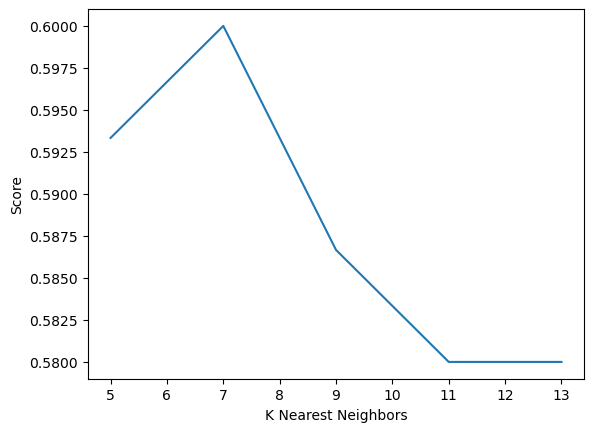

In [6]:
MIN, MAX, STEP = 5, 15, 2
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

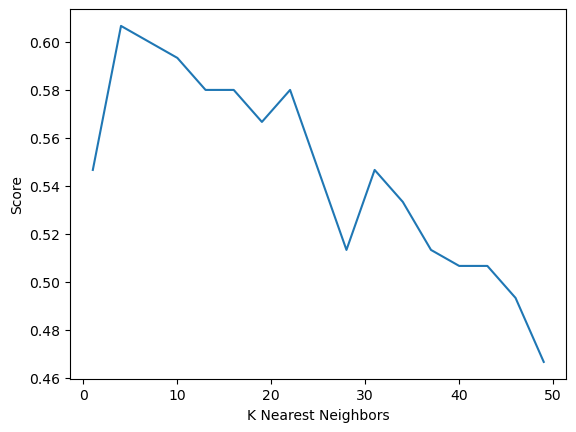

In [43]:
MIN, MAX, STEP = 1, 50, 3
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

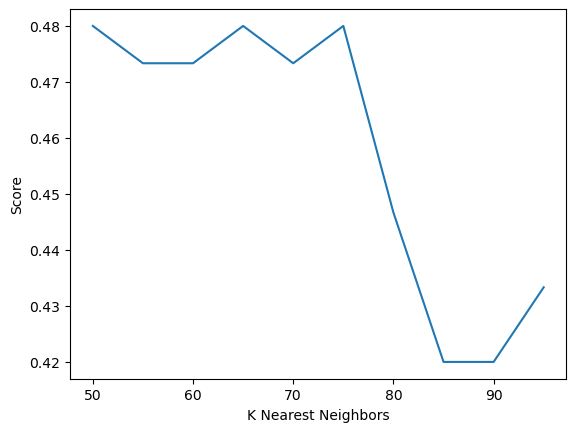

In [44]:
MIN, MAX, STEP = 50, 100, 5
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

In [7]:
model = SVC(C=9,probability=True)
model.fit(X_train,y_train)
print(i,model.score(X_test,y_test))

4 0.6866666666666666


In [11]:
genresToUse = [6,3,8] #6=rock, 3=blues, 8=country
dataRockBluesCountry = dfWithGenresMappedToInts[dfWithGenresMappedToInts.iloc[:, -1].isin(genresToUse)]
dataRockBluesCountry.shape

(300, 45)

In [12]:
X_rbc = dataRockBluesCountry.iloc[:, :-1] 
y_rbc = dataRockBluesCountry.iloc[:, -1]
X_train_rbc, X_test_rbc, y_train_rbc, y_test_rbc = train_test_split(X_rbc, y_rbc, test_size = 0.15, random_state = 42)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train_rbc)
X_train_rbc = scaler.transform(X_train_rbc)
X_test_rbc = scaler.transform(X_test_rbc)

Text(0, 0.5, 'Score')

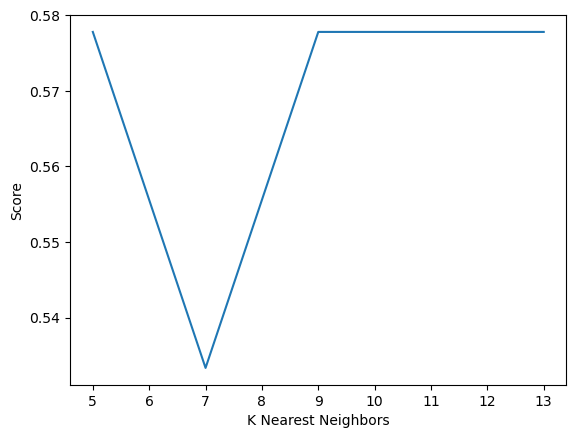

In [15]:
MIN, MAX, STEP = 5, 15, 2
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train_rbc,y_train_rbc)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test_rbc, y_test_rbc) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

In [16]:
model = SVC(C=9,probability=True)
model.fit(X_train_rbc,y_train_rbc)
print(i,model.score(X_test_rbc,y_test_rbc))

4 0.6888888888888889


/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_90732/1249781310.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_pca[:,0][y_test==i], trans_pca[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')


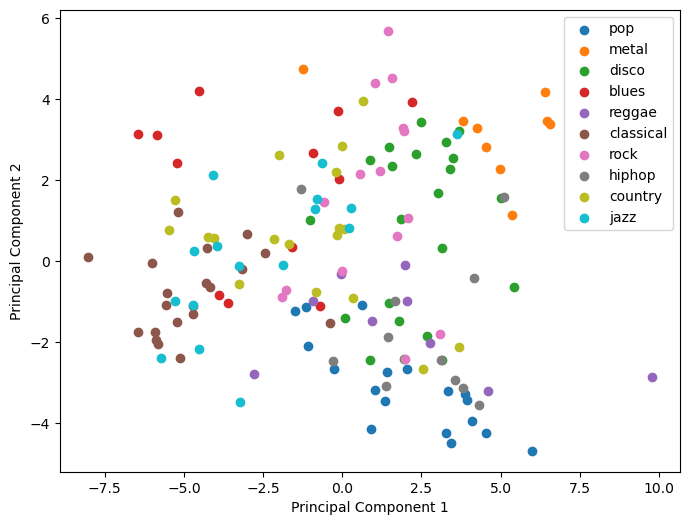

In [31]:
import pylab

pca = PCA(2)
pca.fit(X_train)
trans_pca = pca.fit_transform(X_test)

genres=['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(trans_pca[:,0][y_test==i], trans_pca[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Interpretation: By examining the plot, you can gain insights into how well the PCA algorithm is able to separate the different music genres based on the given features. A clear separation between clusters suggests that the PCA transformation is effective in capturing the underlying structure of the data, whereas overlap between clusters might indicate that the genres are more similar in terms of the chosen features.

In summary, the plot provides a visual representation of the relationships and similarities between different music genres in a reduced-dimensional space obtained through PCA. It helps in understanding the distribution of music genres and the effectiveness of PCA in representing the data.

PCA attempts to capture the maximum variance in the data, but it might not be the best technique for capturing the underlying structure of your data. We don't see any clear patterns or clusters.

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_90732/3138321272.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_tsne[:,0][y_test==i], trans_tsne[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')


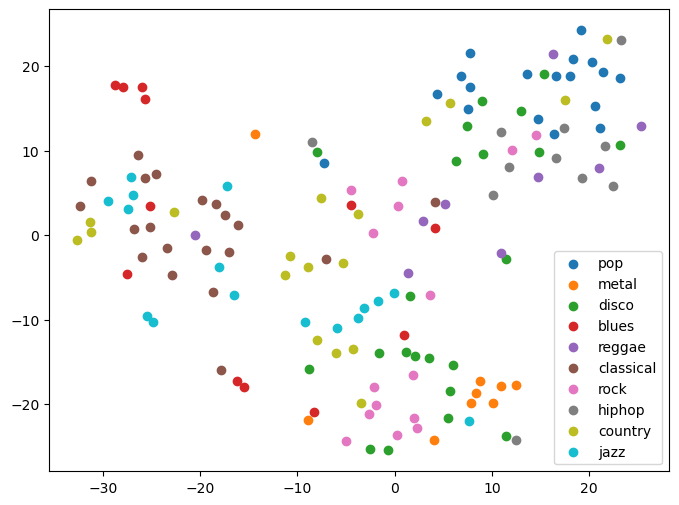

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=10)
trans_tsne = tsne.fit_transform(X_test)

genres=['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(trans_tsne[:,0][y_test==i], trans_tsne[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')
plt.legend()
plt.show()

In summary, while PCA is a linear technique that focuses on capturing global variance in the data, t-SNE is a nonlinear technique that emphasizes preserving local structure and is often used for visualization purposes, especially when exploring complex, high-dimensional datasets.


Cluster Formation:

Look for clusters of data points that are close together in the plot. Clusters suggest groups of similar instances in the original high-dimensional space.
Pay attention to the density and compactness of clusters. Denser clusters indicate stronger similarities among data points within the cluster.
Separation between Clusters:

Observe the separation between different clusters in the plot. Larger distances between clusters suggest greater dissimilarities among the corresponding groups of instances.
Note any overlap or proximity between clusters, as it might indicate similarities or ambiguities between different classes.
Outliers and Noise:

Identify any isolated or scattered data points that do not belong to any discernible cluster. These points could represent outliers or noise in the dataset.
Inter-Class Relationships:

Examine the relative positions of different classes or categories in the plot. Are certain classes clustered closely together, indicating similarities? Or are they spread apart, suggesting distinctiveness?
Look for any patterns or trends in the arrangement of classes, such as hierarchical relationships or transitions between categories.
Perplexity Consideration:

Since you've set the perplexity parameter to 10, consider its influence on the plot. Lower perplexity values may lead to more local structures being emphasized, while higher values may capture more global structures. Experiment with different perplexity values to see their effects.
Comparison with Domain Knowledge:

Compare the observed patterns in the t-SNE plot with your domain knowledge or hypotheses about the dataset. Does the plot align with your expectations regarding the relationships between different classes or categories?
Validate any insights or interpretations derived from the plot by examining the original dataset and its characteristics.
Iterative Analysis:

Perform iterative analysis by adjusting parameters or preprocessing steps and re-generating the t-SNE plot. This iterative process can help refine your understanding of the dataset and reveal additional insights.
By carefully examining the t-SNE scatter plot and considering the points mentioned above, you can uncover valuable insights into the underlying structure of your dataset and gain a deeper understanding of its characteristics.

# from homework 3

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


X = dfWithGenresMappedToInts.iloc[:, :-1] 
y = dfWithGenresMappedToInts.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


kf = KFold(n_splits=10, shuffle=True, random_state=42)

cValues = [2**i for i in range(-5, 5)]
degrees = [1, 2, 3, 4]

accuracyScores = []
accuracyScoreMeans = []
for degree in degrees:
    for c in cValues:
        svm = SVC(kernel='poly', degree=degree, C=c)
        score = cross_val_score(svm, X=X_train, y=y_train, cv=kf, verbose=1)
        score_mean = np.mean(score)
        accuracyScores.append((degree, c, score))
        accuracyScoreMeans.append((degree, c, score_mean))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

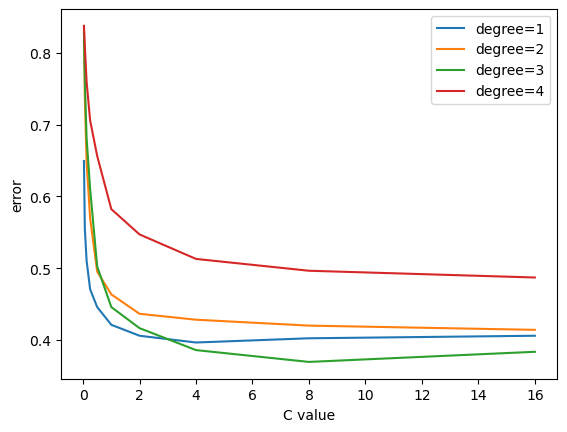

In [38]:
lines = {}

for degree, C, score in accuracyScoreMeans:
    if degree not in lines:
        lines[degree] = {'C': [], 'error': []}
    lines[degree]['C'].append(C)
    lines[degree]['error'].append(1 - score)

for degree, values in lines.items():
    plt.plot(values['C'], values['error'], label=f'degree={degree}')

plt.xlabel('C value')
plt.ylabel('error')
plt.legend()

plt.show()

In [39]:
accuracyScoreMeans.sort(key=lambda x: x[2], reverse=True)

bestParams = accuracyScoreMeans[0]
bestDegree = bestParams[0]
bestC = bestParams[1]

print("Best Parameters:")
print("Degree:", bestDegree)
print("C:", bestC)

Best Parameters:
Degree: 3
C: 8


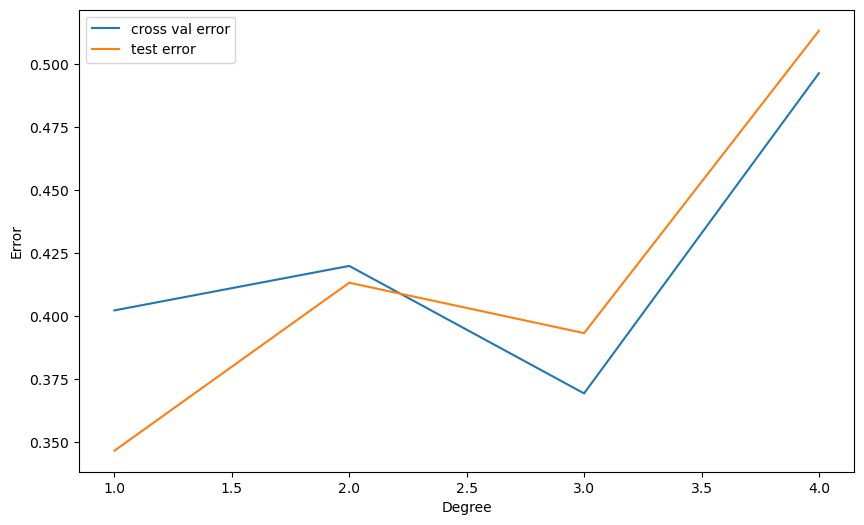

In [41]:
import matplotlib.pyplot as plt

cv_errors = []
test_errors = []

for degree in degrees:
    svm = SVC(kernel='poly', degree=degree, C=bestC)
    cv_scores = cross_val_score(svm, X_train, y_train, cv=kf)
    cv_error = 1 - np.mean(cv_scores)
    cv_errors.append(cv_error)
    
    svm.fit(X_train, y_train)
    test_error = 1 - svm.score(X_test, y_test)
    test_errors.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_errors, label='cross val error')
plt.plot(degrees, test_errors, label='test error')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()
plt.show()

In [42]:
model = SVC(C=8,degree=3, kernel='poly',)
model.fit(X_train,y_train)
print(i,model.score(X_test,y_test))

9 0.6066666666666667


# genres = ['classical','hiphop','metal', 'disco', 'reggae']

In [70]:
genres = ['classical','hiphop','metal', 'disco', 'reggae']
genreNumbers = [5, 7, 1, 2, 4]

dataSpecifiedGenres = dfWithGenresMappedToInts[dfWithGenresMappedToInts.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

(500, 45)

In [71]:
dataSpecifiedGenres.head()

chroma_C  chroma_Csharp  chroma_D  chroma_Dsharp  chroma_E  chroma_F  \
100  0.197645       0.253560  0.530577       0.676284  0.603167  0.416595   
101  0.555681       0.554876  0.646270       0.524454  0.509183  0.502343   
102  0.412719       0.367689  0.338250       0.434104  0.592827  0.422646   
103  0.491189       0.567155  0.589308       0.469433  0.495655  0.505738   
104  0.455604       0.366034  0.405422       0.474057  0.520951  0.465351   

     chroma_Fsharp  chroma_G  chroma_Gsharp  chroma_A  ...     mfcc12  \
100       0.469057  0.586434       0.534654  0.490844  ...   3.106380   
101       0.473830  0.506142       0.482216  0.537800  ...  13.270273   
102       0.298741  0.387750       0.440941  0.507487  ...   2.069035   
103       0.592601  0.645546       0.479652  0.420058  ...  12.123793   
104       0.575677  0.598739       0.511573  0.469804  ...  10.866733   

        mfcc13    mfcc14     mfcc15    mfcc16     mfcc17    mfcc18    mfcc19  \
100  -5.482180 -3.721103   2.062520  5.397898  -2.783332 -2.303997  5.608458   
101  -6.233259  6.815860  -4.593929  8.090997  -3.150598  7.384811  3.013946   
102   0.510632  0.080939  -5.362499  1.468842  -5.070672 -3.474967  4.940016   
103  -7.780693  1.680955  -3.062496  5.239401  -5.106991  5.147161  2.171933   
104 -18.028728  8.665884 -13.761690  1.942730 -13.207386 -1.109173 -7.485201   

       mfcc20  genre  
100 -2.078828      1  
101  2.752292      1  
102 -6.387615      1  
103  5.962196      1  
104 -0.156378      1  

[5 rows x 45 columns]

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_90732/2136999120.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_pca[:,0][y_test==genre], trans_pca[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')


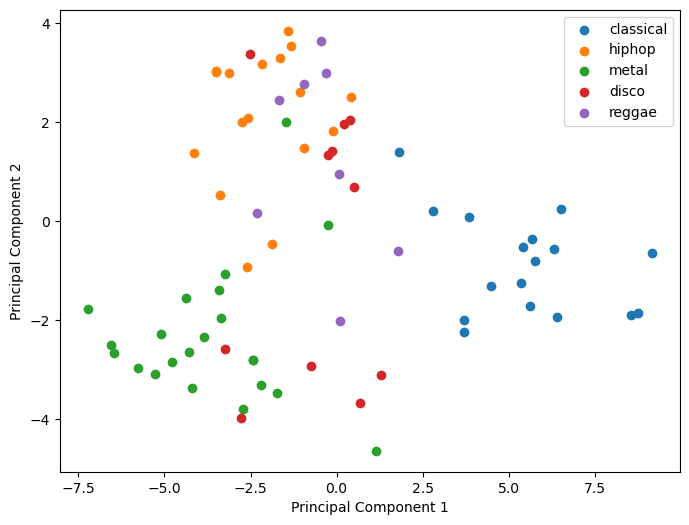

In [72]:
X = dataSpecifiedGenres.iloc[:, :-1] 
y = dataSpecifiedGenres.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(5)
pca.fit(X_train)
trans_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
for i, genre in enumerate(genreNumbers):
    plt.scatter(trans_pca[:,0][y_test==genre], trans_pca[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_90732/3763613980.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_tsne[:,0][y_test==genre], trans_tsne[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')


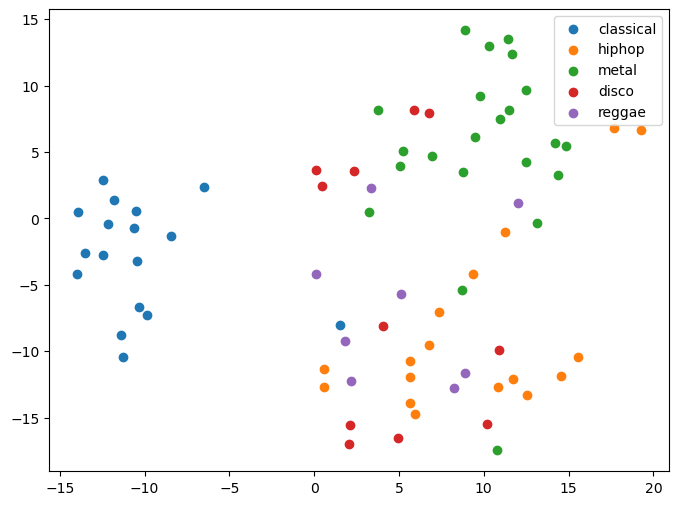

In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=10)
trans_tsne = tsne.fit_transform(X_test)


plt.figure(figsize=(8, 6))
for i, genre in enumerate(genreNumbers):
    plt.scatter(trans_tsne[:,0][y_test==genre], trans_tsne[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')
plt.legend()
plt.show()

Text(0, 0.5, 'Score')

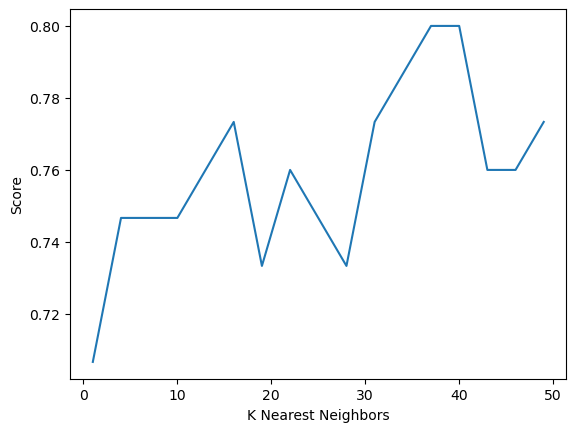

In [74]:
MIN, MAX, STEP = 1, 50, 3
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

Based on the PCA and TSNE graphs, it seems classical, metal, and hiphop would be well seperable

Text(0, 0.5, 'Score')

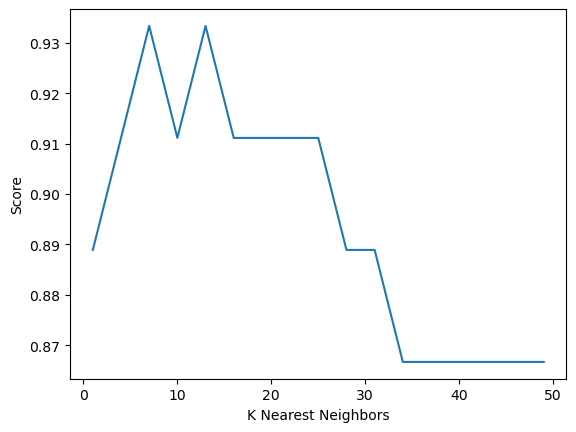

In [81]:
genres = ['classical','hiphop','metal', 'disco', 'reggae']
genreNumbers = [5, 7, 1]

dataSpecifiedGenres = dfWithGenresMappedToInts[dfWithGenresMappedToInts.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

X = dataSpecifiedGenres.iloc[:, :-1] 
y = dataSpecifiedGenres.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MIN, MAX, STEP = 1, 50, 3
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

# genres = ['pop','rock','country', 'jazz', 'blues']


In [82]:
genres = ['pop','rock','country', 'jazz', 'blues']
genreNumbers = [0, 6, 8, 9, 3]

dataSpecifiedGenres = dfWithGenresMappedToInts[dfWithGenresMappedToInts.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

(500, 45)

In [83]:
dataSpecifiedGenres.head()

chroma_C  chroma_Csharp  chroma_D  chroma_Dsharp  chroma_E  chroma_F  \
0  0.391512       0.429697  0.524729       0.385698  0.366340  0.433856   
1  0.544175       0.420254  0.424198       0.399732  0.300949  0.312941   
2  0.344232       0.477342  0.461315       0.383294  0.430534  0.360271   
3  0.392071       0.428158  0.523789       0.385555  0.366227  0.433113   
4  0.396111       0.442692  0.408399       0.486187  0.353345  0.326342   

   chroma_Fsharp  chroma_G  chroma_Gsharp  chroma_A  ...    mfcc12    mfcc13  \
0       0.445597  0.593311       0.438685  0.413015  ...  0.164212  2.695709   
1       0.363381  0.445987       0.342582  0.325424  ...  5.130442  6.827752   
2       0.595679  0.406584       0.354102  0.464613  ...  1.111607 -2.048577   
3       0.444056  0.591267       0.437267  0.413407  ...  0.235207  2.670471   
4       0.372000  0.300399       0.334868  0.334352  ... -0.269821 -1.642580   

     mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19    mfcc20  genre  
0  1.318642  0.632315  0.957001 -1.566437  6.275709  7.807974  6.363476      0  
1  3.071533  3.366904 -2.422404 -2.135466 -3.336569 -0.564991 -3.893568      0  
2 -4.366745 -3.732610 -3.398216  2.417332  1.289159  7.578645  4.909898      0  
3  1.338333  0.699207  1.112011 -1.565463  6.195435  7.648764  6.243628      0  
4 -4.781828 -3.302547 -4.714705 -3.559506 -3.702941 -4.042264  0.333003      0  

[5 rows x 45 columns]

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_90732/1862517793.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_pca[:,0][y_test==genre], trans_pca[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')


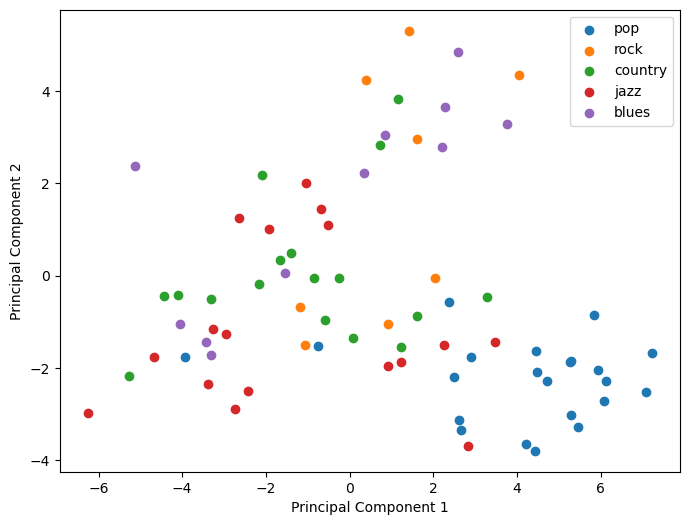

In [84]:
X = dataSpecifiedGenres.iloc[:, :-1] 
y = dataSpecifiedGenres.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(2)
pca.fit(X_train)
trans_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
for i, genre in enumerate(genreNumbers):
    plt.scatter(trans_pca[:,0][y_test==genre], trans_pca[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_90732/3763613980.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_tsne[:,0][y_test==genre], trans_tsne[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')


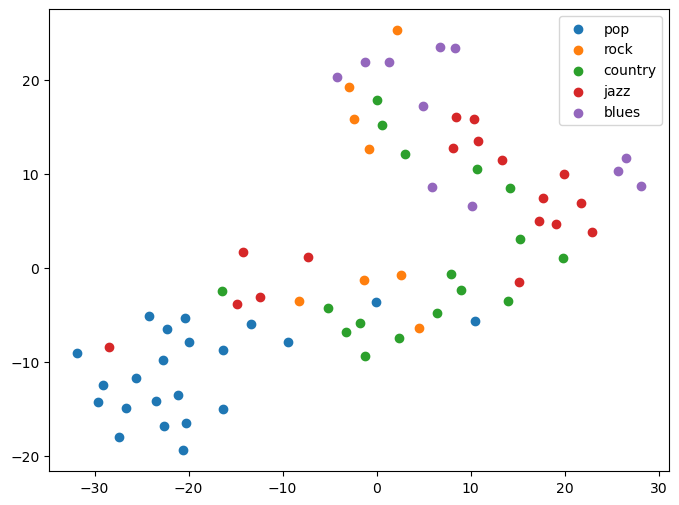

In [85]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=10)
trans_tsne = tsne.fit_transform(X_test)


plt.figure(figsize=(8, 6))
for i, genre in enumerate(genreNumbers):
    plt.scatter(trans_tsne[:,0][y_test==genre], trans_tsne[:,1][y_test==genre], cmap='jet',label=f'{genres[i]}')
plt.legend()
plt.show()

Text(0, 0.5, 'Score')

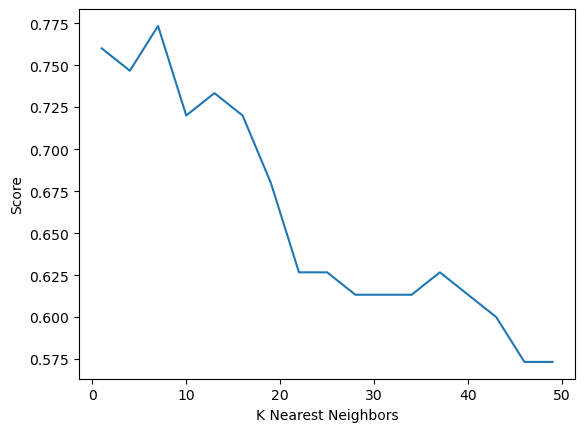

In [86]:
MIN, MAX, STEP = 1, 50, 3
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

Based on the PCA and TSNE graphs, it seems pop and blues would be well seperable

Text(0, 0.5, 'Score')

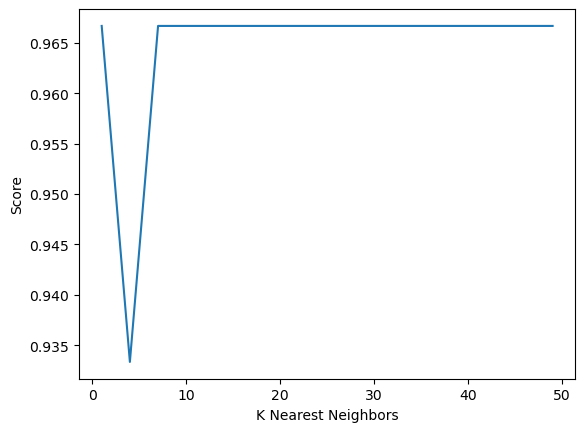

In [87]:
genres = ['pop', 'blues']
genreNumbers = [0, 3]

dataSpecifiedGenres = dfWithGenresMappedToInts[dfWithGenresMappedToInts.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

X = dataSpecifiedGenres.iloc[:, :-1] 
y = dataSpecifiedGenres.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MIN, MAX, STEP = 1, 50, 3
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

Based on the overall PCA and TSNE graphs of all the features from way up in the page, it seems pop, metal, and classical will be well-seperable

Text(0, 0.5, 'Score')

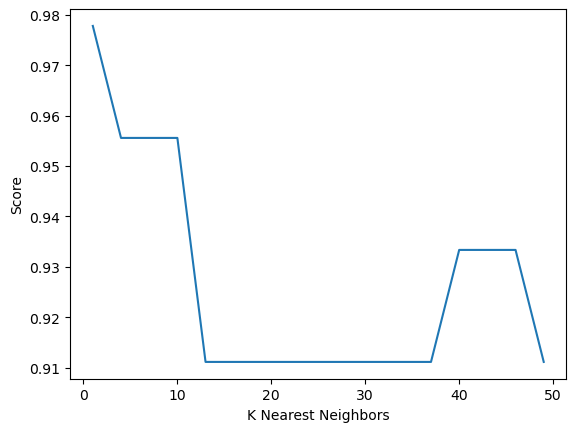

In [88]:
genres = ['pop', 'metal', 'classical']
genreNumbers = [0, 1, 5]

dataSpecifiedGenres = dfWithGenresMappedToInts[dfWithGenresMappedToInts.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

X = dataSpecifiedGenres.iloc[:, :-1] 
y = dataSpecifiedGenres.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MIN, MAX, STEP = 1, 50, 3
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")